In [13]:
from importlib import reload
import qubic.job_manager as jm
import chipcalibration.rabi_experiments as rabi
import chipcalibration.ramsey as gordon
from matplotlib import pyplot as plt
from distproc.hwconfig import FPGAConfig, load_channel_configs
import chipcalibration.config as cfg
import qubic.rpc_client as rc
import numpy as np
import logging
import chipcalibration.graph as graph
import networkx as nx
logging.getLogger().setLevel(logging.INFO)
reload(gordon)

<module 'chipcalibration.ramsey' from '/home/neelay/chipcalibration/chipcalibration/ramsey.py'>

In [14]:
fpga_config = FPGAConfig(**{'fpga_clk_period': 2.e-9, 'alu_instr_clks': 5, 'jump_cond_clks': 5, 'jump_fproc_clks': 5,
                            'pulse_regwrite_clks': 3})

qchipname = 'X4Y2'
fpga_config, qchip, channel_config = cfg.load_configs(qchipname, qchip_file='qubitcfg.json')



In [15]:
runner = rc.CircuitRunnerClient(ip='192.168.1.247')
job_manager = jm.JobManager(fpga_config, channel_config, runner, qchip)

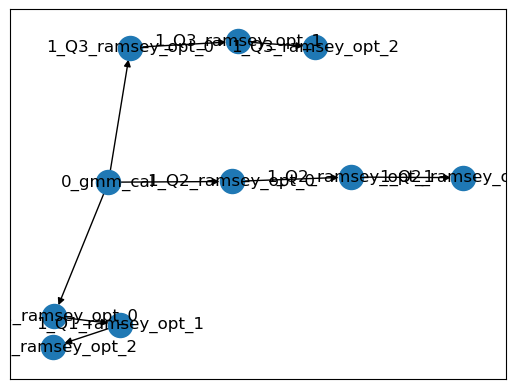

In [16]:
# construct calibration graphs
cal_graph = graph.CalibrationGraph()
pulse_width_interval = np.linspace(0, 100e-9, 10)
qubits = ['Q1', 'Q2', 'Q3']
cal_graph.add_calibration_step('gmm_cal', rabi.GMMRabi(qubits, pulse_width_interval, 
                                                     channel_configs=channel_config), qubits, 
                            shots_per_circuit=1000)
ramsey_cal = gordon.get_refinement_graph(qubits)

# compose graphs
cal_graph.append_by_qubit(ramsey_cal)
nx.draw_networkx(cal_graph.graph)

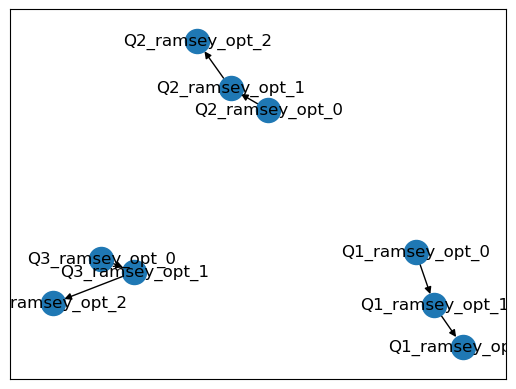

In [17]:
nx.draw_networkx(ramsey_cal.graph)

INFO:chipcalibration.graph:starting calibration step 0_gmm_cal


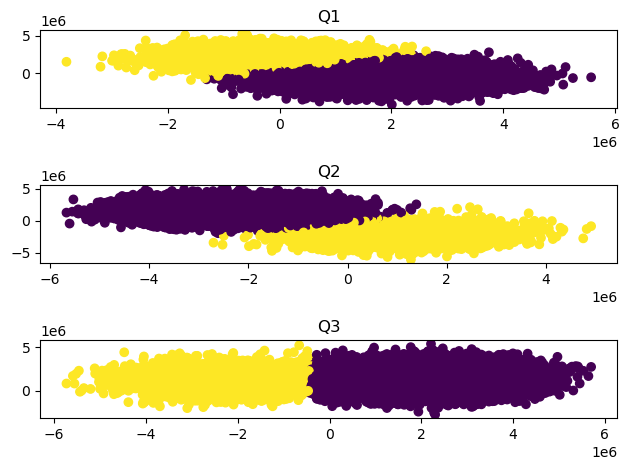

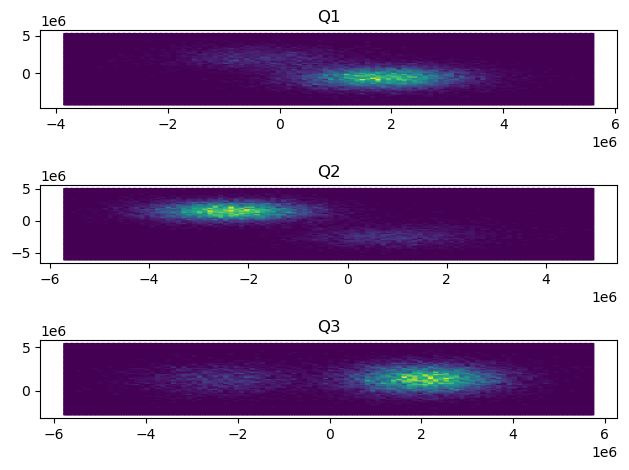

<Figure size 640x480 with 0 Axes>

INFO:chipcalibration.graph:starting calibration step 1_Q1_ramsey_opt_0
INFO:chipcalibration.ramsey:done initial ramsey; results: {'initial': {'cos_exp': {'scale': 0.3789747636294297, 'offset': 0.42200702973320847, 'freq': 2358724.6272539687, 'phase': -0.24039381675003293, 'decay_time': -0.5840378004392386, 'total_var': array([4.90982301e-05, 2.38180398e-04, 2.90333388e+09, 5.39195825e-03,
       3.90939512e+09]), 'fit_resid': 0.02140378240818282}, 'exp': {'scale': 0.8666447598344273, 'offset': 0.10638509629399849, 'decay_time': 7.381207320482899e-08, 'total_var': array([1.92734400e-03, 6.69303656e-04, 8.65939552e-17]), 'fit_resid': 1.0544325505316239}}}
INFO:chipcalibration.ramsey:done + ramsey; results: {'cos_exp': {'scale': 0.3874503985017287, 'offset': 0.44201372278084183, 'freq': 4611266.678374918, 'phase': -0.7929614973000686, 'decay_time': -56.38087743482238, 'total_var': array([1.00399842e-05, 4.40495901e-06, 1.68132226e+08, 1.81231383e-04,
       2.47243216e+15]), 'fit_resid': 

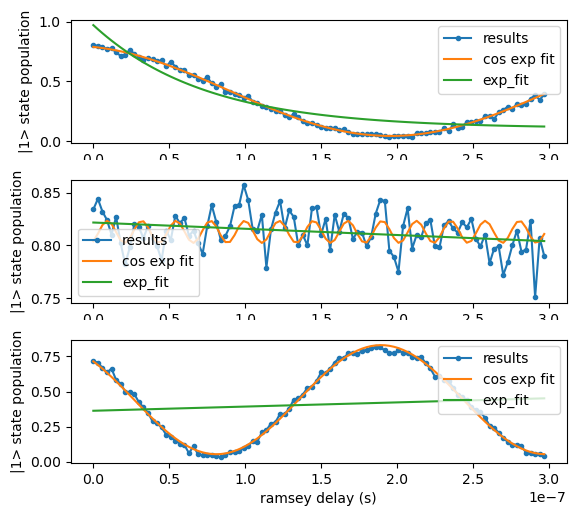

INFO:chipcalibration.ramsey:updating qchip with df = -2358724.6272539687
INFO:chipcalibration.graph:starting calibration step 1_Q2_ramsey_opt_0
INFO:chipcalibration.ramsey:done initial ramsey; results: {'initial': {'cos_exp': {'scale': 0.4716865700531061, 'offset': 0.4246196622525917, 'freq': 1033732.3111517276, 'phase': -0.34561065948894487, 'decay_time': -0.08620372681186063, 'total_var': array([1.28389836e-01, 2.29246905e-01, 2.30892795e+10, 7.42905666e-01,
       6.46870112e+08]), 'fit_resid': 0.023528895853912088}, 'exp': {'scale': -1.299154394909368, 'offset': 2.1971823678868634, 'decay_time': -6.169399890987406e-07, 'total_var': array([4.68674812e-02, 4.87543071e-02, 6.65673774e-15]), 'fit_resid': 0.03446432062350582}}}
INFO:chipcalibration.ramsey:done + ramsey; results: {'cos_exp': {'scale': 0.03761576214941125, 'offset': 0.8892147432019984, 'freq': 786451.5081411109, 'phase': -1.4972197961079001, 'decay_time': -0.011683644167621523, 'total_var': array([7.93831923e-02, 6.592870

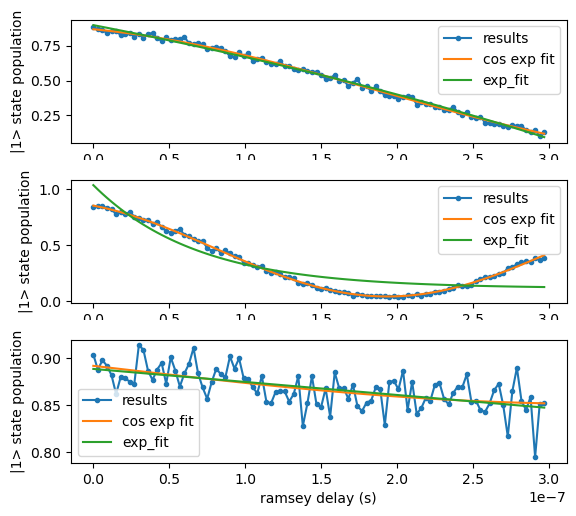

INFO:chipcalibration.ramsey:updating qchip with df = 1033732.3111517276
INFO:chipcalibration.graph:starting calibration step 1_Q3_ramsey_opt_0
INFO:chipcalibration.ramsey:done initial ramsey; results: {'initial': {'cos_exp': {'scale': 0.26922084502552435, 'offset': 0.6001007409603515, 'freq': 1164519.6298314354, 'phase': 0.08565256546626338, 'decay_time': -0.9122459375217911, 'total_var': array([8.53969370e-03, 7.92740370e-03, 4.55918191e+10, 3.05196405e-02,
       2.56690323e+11]), 'fit_resid': 0.05060043715291067}, 'exp': {'scale': -0.16515706750042028, 'offset': 1.060822040766075, 'decay_time': -2.2589952746145197e-07, 'total_var': array([1.21139123e-03, 1.61606795e-03, 7.11979756e-16]), 'fit_resid': 0.05857902520741176}}}
INFO:chipcalibration.ramsey:done + ramsey; results: {'cos_exp': {'scale': 0.4291929925555998, 'offset': 0.45630839400018136, 'freq': 2014737.1148928008, 'phase': -0.18038284027258097, 'decay_time': 0.99426459867847, 'total_var': array([2.59478516e-04, 6.48713533e-

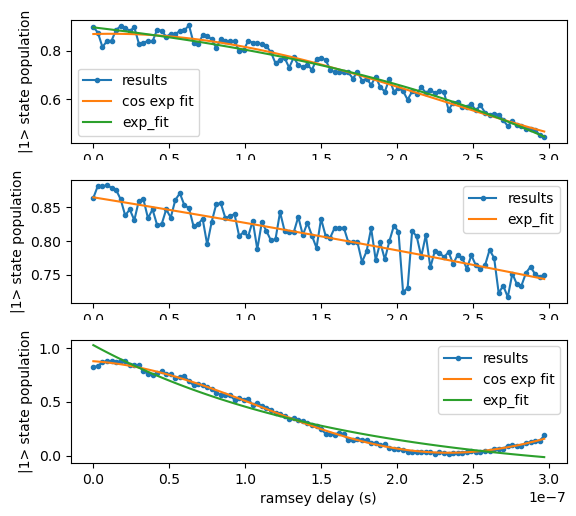

INFO:chipcalibration.ramsey:updating qchip with df = -1164519.6298314354
INFO:chipcalibration.graph:starting calibration step 1_Q1_ramsey_opt_1
INFO:chipcalibration.ramsey:done initial ramsey; results: {'initial': {'cos_exp': {'scale': 0.3810319571917194, 'offset': 0.4663125571329772, 'freq': 111884.33301532247, 'phase': -0.24141372775618733, 'decay_time': 4.8987610197556375, 'total_var': array([9.65710696e-03, 1.61211356e-02, 4.15903938e+07, 9.98848430e-02,
       9.42165437e+12]), 'fit_resid': 0.03290914277342044}, 'exp': {'scale': 2903.4142090690184, 'offset': -2902.517966610146, 'decay_time': 0.012673792138025866, 'total_var': array([8.99138867e+10, 8.99138882e+10, 1.71375235e+00]), 'fit_resid': 0.06556839713008575}}}
INFO:chipcalibration.ramsey:done + ramsey; results: {'cos_exp': None, 'exp': {'scale': 0.07773507699090906, 'offset': 0.7510259960233544, 'decay_time': 3.2408314430512707e-06, 'total_var': array([1.43341503e-03, 1.72829480e-03, 8.18604124e-12]), 'fit_resid': 0.0282733

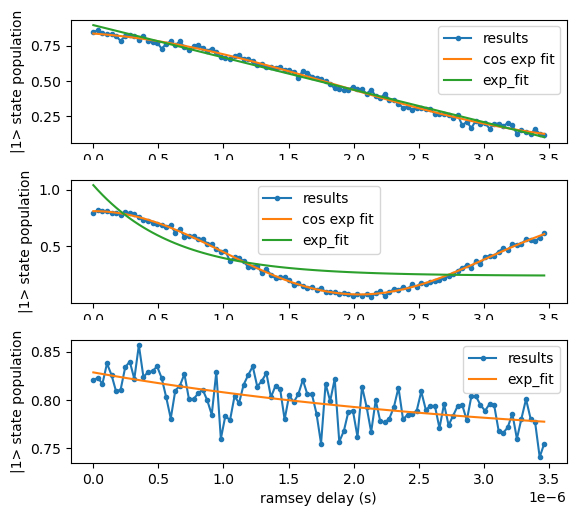

INFO:chipcalibration.ramsey:updating qchip with df = 111884.33301532247
INFO:chipcalibration.graph:starting calibration step 1_Q2_ramsey_opt_1
INFO:chipcalibration.ramsey:done initial ramsey; results: {'initial': {'cos_exp': {'scale': 0.38230282325871745, 'offset': 0.4962795566512653, 'freq': 165562.22969220032, 'phase': -0.10833990294182563, 'decay_time': 31.40292656039267, 'total_var': array([7.65405183e-05, 9.74449462e-05, 6.91511669e+06, 1.94627349e-03,
       2.42632030e+14]), 'fit_resid': 0.024173131754970007}, 'exp': {'scale': 1.3457948084689482, 'offset': -0.3488437786911294, 'decay_time': 2.8410142564882125e-06, 'total_var': array([7.69611268e-03, 9.75166524e-03, 1.34620774e-13]), 'fit_resid': 0.2798776951774645}}}
INFO:chipcalibration.ramsey:done + ramsey; results: {'cos_exp': {'scale': 0.0400967937542848, 'offset': 0.8452474048472842, 'freq': 106832.9182804655, 'phase': -0.9411303001857505, 'decay_time': 0.19959134361640649, 'total_var': array([1.19929753e-03, 9.02866980e-02

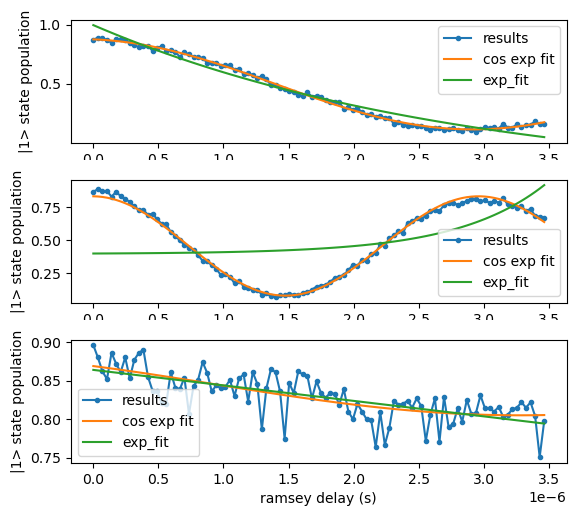

INFO:chipcalibration.ramsey:updating qchip with df = 165562.22969220032
INFO:chipcalibration.graph:starting calibration step 1_Q3_ramsey_opt_1
INFO:chipcalibration.ramsey:done initial ramsey; results: {'initial': {'cos_exp': {'scale': 0.40364931606346915, 'offset': 0.439667859479015, 'freq': 298819.448165686, 'phase': -0.1916245782379783, 'decay_time': 9.350682483523604e-06, 'total_var': array([4.61940372e-05, 1.03018014e-05, 6.10517862e+06, 6.37191685e-04,
       4.94460533e-13]), 'fit_resid': 0.026891957765690238}, 'exp': {'scale': 0.0006066719848437297, 'offset': 0.3666792582693148, 'decay_time': -5.1379404970189e-07, 'total_var': array([2.21648215e-06, 1.06271077e-03, 3.76262080e-14]), 'fit_resid': 4.4326322919253105}}}
INFO:chipcalibration.ramsey:done + ramsey; results: {'cos_exp': {'scale': 0.06477222476411622, 'offset': 0.7868830649333555, 'freq': 133078.81090970116, 'phase': -0.19146701876120517, 'decay_time': -0.38868847478925717, 'total_var': array([5.57319758e-03, 9.54240874

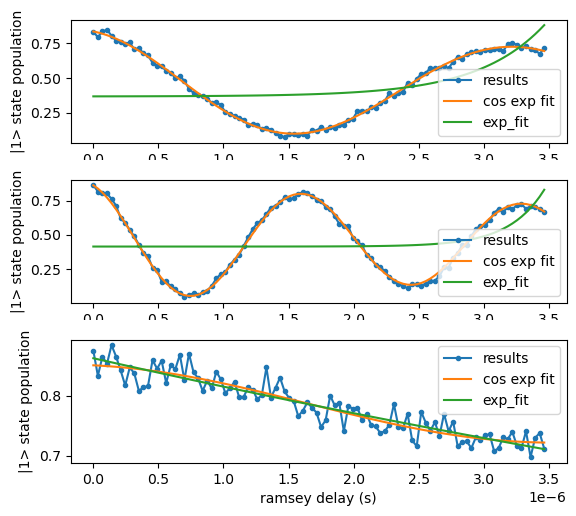

INFO:chipcalibration.ramsey:updating qchip with df = 298819.448165686
INFO:chipcalibration.graph:starting calibration step 1_Q1_ramsey_opt_2
INFO:chipcalibration.ramsey:done initial ramsey; results: {'initial': {'cos_exp': {'scale': 0.5132096099324155, 'offset': 0.43946766145442817, 'freq': 13545.029454291483, 'phase': 0.7798432336353373, 'decay_time': 1.2929619427472439e-05, 'total_var': array([3.17504387e-02, 4.02814899e-04, 1.46104766e+06, 1.23321922e-01,
       2.30025462e-11]), 'fit_resid': 0.1432253749001061}, 'exp': {'scale': 0.5124310202679497, 'offset': 0.3750285204762124, 'decay_time': 1.5734736919201295e-05, 'total_var': array([3.04985835e-04, 2.37422844e-04, 2.62192608e-12]), 'fit_resid': 0.18853697508368586}}}
INFO:chipcalibration.ramsey:done + ramsey; results: {'cos_exp': {'scale': 0.8163087708935106, 'offset': 0.4387196137006156, 'freq': 4896.033610030163, 'phase': 1.1347297969109251, 'decay_time': 1.3837929085144276e-05, 'total_var': array([1.39918489e+01, 7.56809708e-0

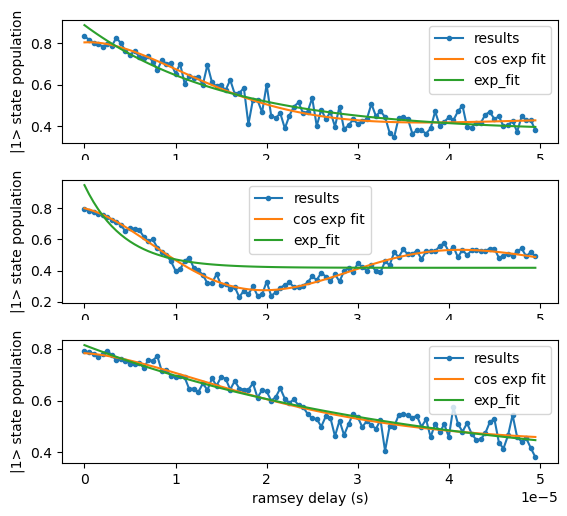

INFO:chipcalibration.ramsey:updating qchip with df = 13545.029454291483
INFO:chipcalibration.graph:starting calibration step 1_Q2_ramsey_opt_2
INFO:chipcalibration.ramsey:done initial ramsey; results: {'initial': {'cos_exp': {'scale': 0.5984416917367951, 'offset': 0.44758624473405756, 'freq': 0.9220482817581008, 'phase': 0.7753431599425231, 'decay_time': 1.9754874765437015e-05, 'total_var': array([3.97620512e+10, 8.28980695e-05, 3.74364407e+11, 1.15582902e+11,
       1.51203250e-06]), 'fit_resid': 0.02653597869499228}, 'exp': {'scale': 0.42739739414272065, 'offset': 0.4475870342672664, 'decay_time': 1.9756790250579508e-05, 'total_var': array([5.32683199e-05, 7.00016262e-05, 1.20158104e-12]), 'fit_resid': 0.026535993851031506}}}
INFO:chipcalibration.ramsey:found deltaf = 0


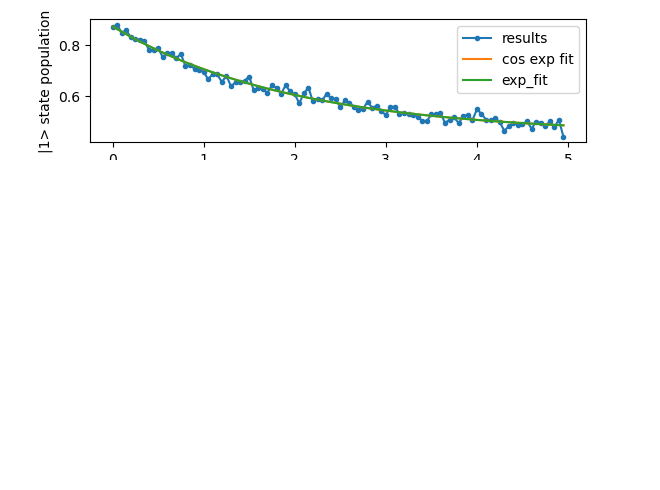

INFO:chipcalibration.ramsey:updating qchip with df = 0
INFO:chipcalibration.graph:starting calibration step 1_Q3_ramsey_opt_2
INFO:chipcalibration.ramsey:done initial ramsey; results: {'initial': {'cos_exp': {'scale': 0.42963700110227554, 'offset': 0.4247145596380774, 'freq': 0.011285353963693012, 'phase': -0.13421033844904592, 'decay_time': 8.187435424633185e-06, 'total_var': array([9.94190833e+07, 1.74933025e-05, 1.85506434e+08, 2.95431820e+10,
       2.22672863e-12]), 'fit_resid': 0.05814291321305254}, 'exp': {'scale': 0.4257733439862984, 'offset': 0.4247145743839505, 'decay_time': 8.18743787947111e-06, 'total_var': array([1.65852143e-04, 1.68199528e-05, 2.15030502e-13]), 'fit_resid': 0.05814291081619608}}}
INFO:chipcalibration.ramsey:found deltaf = 0


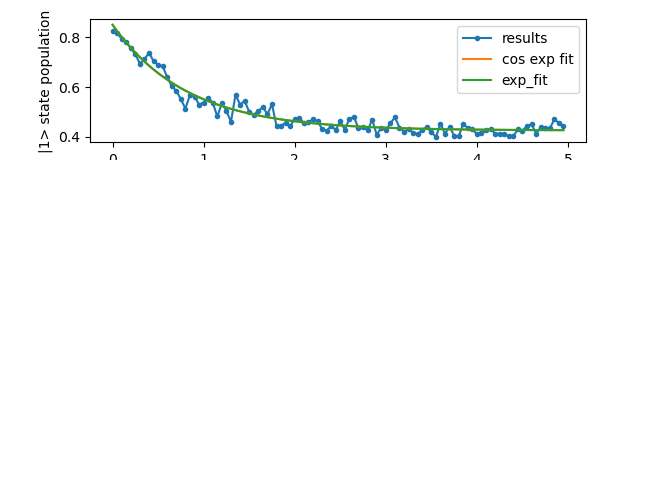

INFO:chipcalibration.ramsey:updating qchip with df = 0


In [18]:
cal_graph.run_calibration(job_manager, qchip, show_plots=True)

In [ ]:
cal_graph.graph.nodes['1_Q3_ramsey_opt_2']['cal_obj'].run_and_report(job_manager, 1000, cal_graph.qchip)

INFO:chipcalibration.ramsey:updating qchip with df = -46480.55277760342


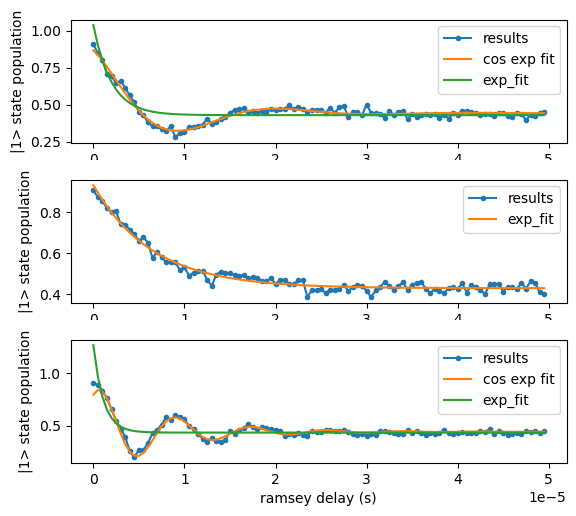

In [12]:
fig = plt.figure()
cal_graph.graph.nodes['1_Q3_ramsey_opt_2']['cal_obj'].plot_results(fig)
cal_graph.graph.nodes['1_Q3_ramsey_opt_2']['cal_obj'].update_qchip(cal_graph.qchip)


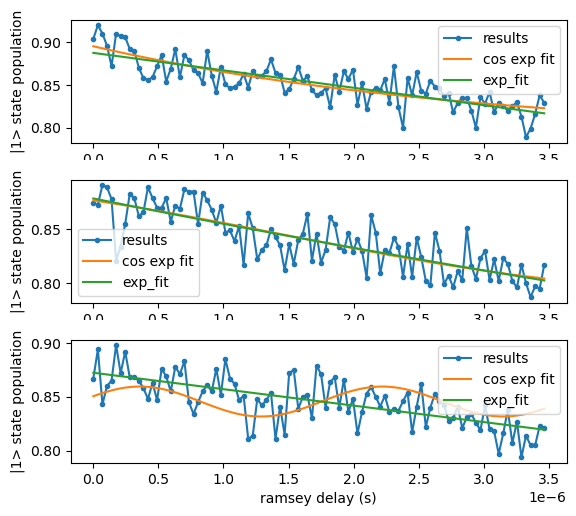

In [7]:
fig = plt.figure()
cal_graph.graph.nodes['1_Q1_ramsey_opt_1']['cal_obj'].plot_results(fig)

In [19]:
cal_graph.graph.nodes['1_Q1_ramsey_opt_1']['cal_obj'].results
#cal_graph.qchip.qubits['Q2'].freq -= -14230
cal_graph.qchip.save('../submodules/qchip/X4Y2/qubitcfg.json')

In [11]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [13]:
fig.suptitle('dasf')

Text(0.5, 0.98, 'dasf')

In [14]:
1/50.e-6

20000.0

In [22]:
cal_graph.gmm_manager.save('../submodules/qchip/X4Y2/Q123_gmm_manager.pkl')